In [1]:
%reload_ext cairo_jupyter

In [2]:
def print_current_path(cr):
    """
    Iterate path and display elements.
    """
    path = cr.copy_path()
    for t, points in path:
        if t == cairo.PATH_MOVE_TO:
            x, y = points
            print("move_to", x, y)

        elif t == cairo.PATH_LINE_TO:
            x, y = points
            print("line_to", x, y)

        elif t == cairo.PATH_CURVE_TO:
            x1, y1, x2, y2, x3, y3 = points
            print("curve_to", x1, y1, x2, y2, x3, y3)

        elif t == cairo.PATH_CLOSE_PATH:
            print("close_path")

In [38]:
# Setup cairo surface and provide a function to clear it
import cairocffi as cairo

WIDTH, HEIGHT = 200, 200
YELLOW = (0.8, 0.8, 0)
WHITE = (1.0, 1.0, 1.0)

surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, WIDTH, HEIGHT)

def clear(cr, color=WHITE):
    cr.set_source_rgb(*color)
    cr.paint()
    cr.set_source_rgb(*YELLOW)


# Work will be on the drawing context 'cr' from now on
cr = cairo.Context(surface)

move_to 0.0 0.0
line_to 40.0 0.0
line_to 40.0 40.0
line_to 0.0 40.0
close_path
move_to 0.0 0.0


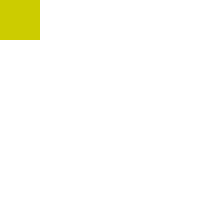

In [4]:
clear(cr)
cr.rectangle(0, 0, 40, 40)

print_current_path(cr)

cr.fill()
display(cr)

move_to 50.0 10.0
curve_to 63.91796875 10.0 76.83203125 17.234375 84.10546875 29.1015625
curve_to 91.37890625 40.96484375 91.95703125 55.7578125 85.640625 68.16015625
curve_to 79.3203125 80.55859375 67.01171875 88.78515625 53.13671875 89.875
curve_to 39.265625 90.96875 25.8203125 84.76953125 17.640625 73.51171875
close_path
move_to 50.0 10.0


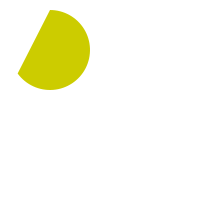

In [32]:
import math

clear(cr)

cr.arc(50, 50, 40, -math.pi * 0.5, math.pi * 0.8)
cr.close_path()

print_current_path(cr)

cr.fill()
display(cr)

In [34]:
def roundedrec(context,x,y,w,h,r = 10):
    "Draw a rounded rectangle"
    #   A****BQ
    #  H      C
    #  *      *
    #  G      D
    #   F****E

    context.move_to(x+r,y)                      # Move to A
    context.line_to(x+w-r,y)                    # Straight line to B
    context.curve_to(x+w,y,x+w,y,x+w,y+r)       # Curve to C, Control points are both at Q
    context.line_to(x+w,y+h-r)                  # Move to D
    context.curve_to(x+w,y+h,x+w,y+h,x+w-r,y+h) # Curve to E
    context.line_to(x+r,y+h)                    # Line to F
    context.curve_to(x,y+h,x,y+h,x,y+h-r)       # Curve to G
    context.line_to(x,y+r)                      # Line to H
    context.curve_to(x,y,x,y,x+r,y)             # Curve to A
    return

move_to 50.0 0.0
line_to 150.0 0.0
curve_to 200.0 0.0 200.0 0.0 200.0 50.0
line_to 200.0 150.0
curve_to 200.0 200.0 200.0 200.0 150.0 200.0
line_to 50.0 200.0
curve_to 0.0 200.0 0.0 200.0 0.0 150.0
line_to 0.0 50.0
curve_to 0.0 0.0 0.0 0.0 50.0 0.0


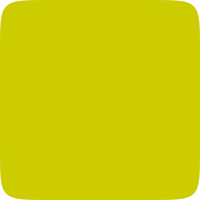

In [37]:
clear(cr)

roundedrec(cr, 0, 0, WIDTH, HEIGHT, 50)

print_current_path(cr)

cr.fill()
display(cr)